### Logistic Regression

 Despite its name, Logistic Regression is used for classification, specifically binary classification (two classes) not regression, and calculates the probability that a data point belongs to a particular class. It works by applying a mathematical function (the logistic or sigmoid function) that transforms a linear combination of features into a value between 0 and 1, representing probability. The algorithm finds the best weights for each feature to maximize the likelihood of the observed data. A decision boundary is created where the probability equals 0.5, and this boundary separates different classes in your feature space. Though it's called "regression," logistic regression actually draws a dividing line (or plane or hyperplane) through your data to separate different categories.

*   **Use Cases:** Use logistic regression when you need probabilities as outputs and want a model that balances simplicity with good performance. It's ideal for binary classification problems or multi-class problems that can be broken down into binary ones. Logistic regression works best when there is a roughly linear relationship between features and the log-odds of the target variable. It assumes that features are independent and have minimal multicollinearity. Logistic regression also assumes that there are no extreme outliers in the data and that there are sufficient samples of each class relative to the number of features.

*   **Pros:** 
    - Outputs well-calibrated probabilities, not just classifications
    - Highly interpretable - coefficients directly indicate feature importance and direction
    - Computationally efficient to train, even on large datasets
    - Less prone to overfitting than more complex models
    - Performs well even when training data is limited
    - Works well as a baseline for classification problems
*   **Cons:** 
    - Limited to linear decision boundaries without feature engineering
    - Cannot capture complex non-linear relationships naturally
    - Struggles with imbalanced datasets without adjustments
    - Sensitive to multicollinearity among features
    - Assumes independence between features (which is rarely true)
    - Feature scaling is required for optimal performance.

*   **Best Practices:** Balance your classes through resampling techniques when one outcome is much more common than others. Scale your features to ensure all variables contribute appropriately to the model. Use regularization (L1 or L2) to prevent overfitting and improve generalization. Check for and address multicollinearity between your input features. Evaluate using appropriate metrics beyond accuracy, such as precision, recall, and the ROC curve, especially for imbalanced datasets. Tune the regularization strength with `C` parameter (smaller values = stronger regularization), `penalty` type ('l1', 'l2', 'elasticnet', or 'none'), `solver` ('liblinear', 'newton-cg', 'lbfgs', 'sag', or 'saga' depending on dataset size and penalty), and `class_weight` ('balanced' or custom dictionary) for imbalanced datasets.

In [2]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
traindf = pd.read_csv('train.csv')
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
traindf.info()
# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

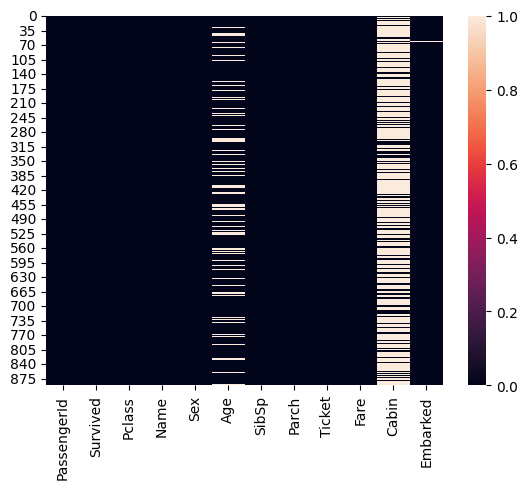

In [6]:
sns.heatmap(traindf.isnull())
# Check for missing values using heatmap

<Axes: xlabel='Survived', ylabel='count'>

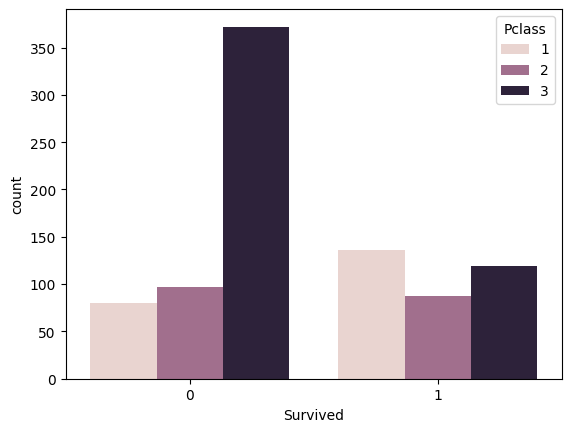

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=traindf)
# Check the distribution of survived passengers by class

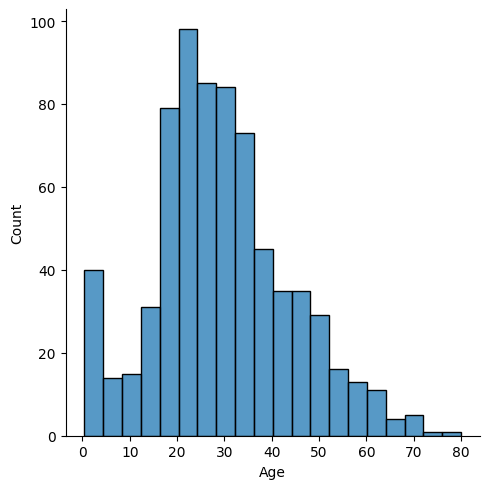

In [8]:
sns.displot(traindf['Age'].dropna())

<Axes: xlabel='Pclass', ylabel='Age'>

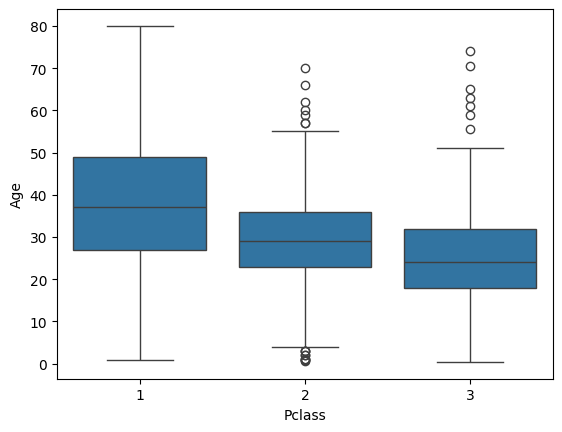

In [9]:
sns.boxplot(x='Pclass',y='Age',data=traindf)
# Check the distribution of age by class

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

traindf['Age'] = traindf[['Age','Pclass']].apply(impute_age,axis=1)
    

C:\Users\kulas\AppData\Local\Temp\ipykernel_12316\72376488.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\kulas\AppData\Local\Temp\ipykernel_12316\72376488.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

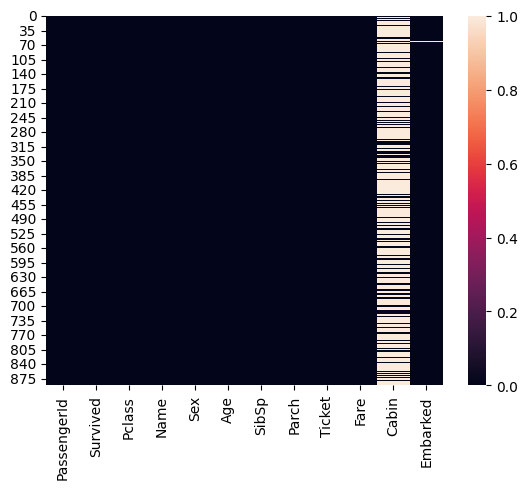

In [11]:
sns.heatmap(traindf.isnull())
# Check for missing values again after applying imputation

In [12]:
traindf.drop(['Cabin', 'Name','PassengerId','Ticket'], axis=1, inplace=True)


In [13]:
traindf = pd.get_dummies(traindf, columns=['Sex', 'Embarked'], drop_first=True)
traindf.head()
# Convert categorical variables to dummy variables

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [15]:
X = traindf.drop('Survived',axis=1)
Y = traindf['Survived']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
x_train , x_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
lm = LogisticRegression()
lm.fit(x_train,y_train)

c:\Users\kulas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred = lm.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.84      0.74      0.79        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179

[[88 11]
 [21 59]]
